Лабораторная работа №2

Выполнила студентка группы 6131-010402D Фролова Анастасия Сергеевна

1:

Считать в pandas.DataFrame любой источник данных: CSV, JSON, Excel-файл, HTML-таблицу и т.п. 

In [1]:
import numpy as np
import pandas as pd

from pathlib import Path
from matplotlib import pyplot as plt

In [ ]:
path = '...'

df = pd.read_csv(Path(path, 'League of Legends Champion Stats 12.1.csv'), sep=";")

2:

Привести описание датасета.

Датасет содержит данные статистику чемпионов рейтинговых игр League of Legends. Эти данные подходят для интересующихся статистикой чемпионов по ролям и % побед.
* Name - имя чемпиона;
* Class - класс чемпиона (Fighter, Assassin, Mage, Marksman, Support or Tank);
* Role - роль в матче (Top, Mid, ADC, Support or Jungle);
* Tier - God, S, A, B, C or D;
* Score - общий счет чемпиона;
* Trend - тенденция счета;
* Win % - процент побед чемпиона;
* Role % - процент ролей, сыгранных на чемпионе;
* Pick % - процент выбора чемпион;
* Ban % - процент бана чемпиона;
* KDA - соотношение (убийства+смерти)/помощи.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    232 non-null    object 
 1   Class   231 non-null    object 
 2   Role    232 non-null    object 
 3   Tier    232 non-null    object 
 4   Score   232 non-null    float64
 5   Trend   232 non-null    float64
 6   Win %   232 non-null    object 
 7   Role %  232 non-null    object 
 8   Pick %  232 non-null    object 
 9   Ban %   232 non-null    object 
 10  KDA     232 non-null    float64
dtypes: float64(3), object(8)
memory usage: 20.1+ KB


In [4]:
df

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,A,58.25,6.52,49.97%,94.62%,4.43%,2.03%,1.97
1,Ahri,Mage,MID,A,53.21,-0.24,49.93%,93.47%,4.62%,1.04%,2.56
2,Akali,Assassin,MID,S,65.30,6.51,48.59%,65.65%,8.16%,12.88%,2.34
3,Akali,Assassin,TOP,A,57.87,3.34,48.57%,34.06%,4.24%,12.88%,2.04
4,Akshan,Marksman,MID,S,59.85,0.65,51.46%,58.01%,4.83%,21.91%,2.23
...,...,...,...,...,...,...,...,...,...,...,...
227,Ziggs,Mage,MID,C,36.44,-0.60,48.37%,24.85%,0.86%,0.60%,2.36
228,Zilean,Support,MID,A,52.20,1.35,54.19%,14.12%,0.56%,1.40%,3.46
229,Zilean,Support,SUPPORT,A,49.44,1.68,50.83%,81.95%,3.38%,1.40%,3.03
230,Zoe,Mage,MID,A,49.77,4.62,49.84%,94.18%,3.62%,1.41%,2.58


3:

matplotlib:

Построить несколько графиков разного вида с использованием matplotlib.

Построить несколько суб-графиков на одном графике используя .subplot.

Построить интерактивный график со слайдером.

In [5]:
print(f'Champion Classes: {df.Class.unique().tolist()}')

Champion Classes: ['Fighter', 'Mage', 'Assassin', 'Marksman', 'Tank', 'Support', nan]


In [6]:
print(f'Champion Roles: {df.Role.unique().tolist()}')

Champion Roles: ['TOP', 'MID', 'SUPPORT', 'JUNGLE', 'ADC']


      Role  Name
0      ADC    27
1   JUNGLE    46
2      MID    58
3  SUPPORT    41
4      TOP    60


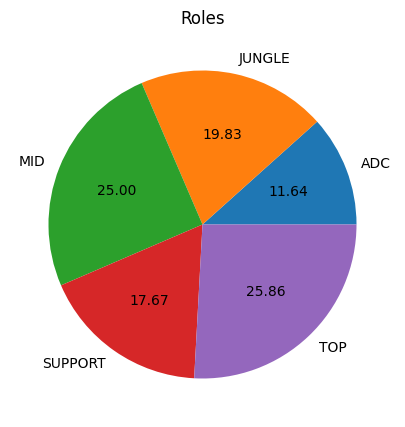

In [7]:
# Круговая диаграмма ролей

roles = df.groupby('Role').Name.count().reset_index()
print(roles)

plt.figure(figsize=(10,5))
plt.pie(roles.Name, labels = roles.Role, autopct='%.2f')
plt.title('Roles')
plt.show()

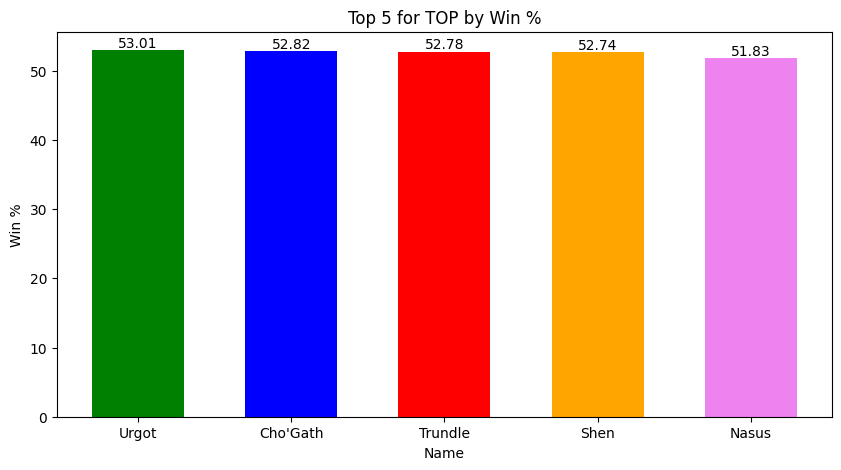

In [8]:
# График через matplotlib
# Решено было сделать столбчатый график для определенной роли

df_TOP = df.loc[df['Role'] == 'TOP'].reset_index()

# Неоюходимо было убрать процент и перевести в численный формат
df_TOP['Win %'] = df_TOP['Win %'].str[:-1].apply(pd.to_numeric)

# Сортируем по проценту побед
df_TOP_W = df_TOP.sort_values(by=['Win %'], ascending =False).reset_index()
colors = ['green', 'blue', 'red', 'orange', 'violet']

plt.figure(figsize=(10, 5))
bar_cont = plt.bar(df_TOP_W['Name'][:5], df_TOP_W['Win %'][:5], width= 0.6, color = colors)

plt.title('Top 5 for TOP by Win %')
plt.xlabel('Name')
plt.ylabel('Win %')
plt.bar_label(bar_cont)
plt.show()

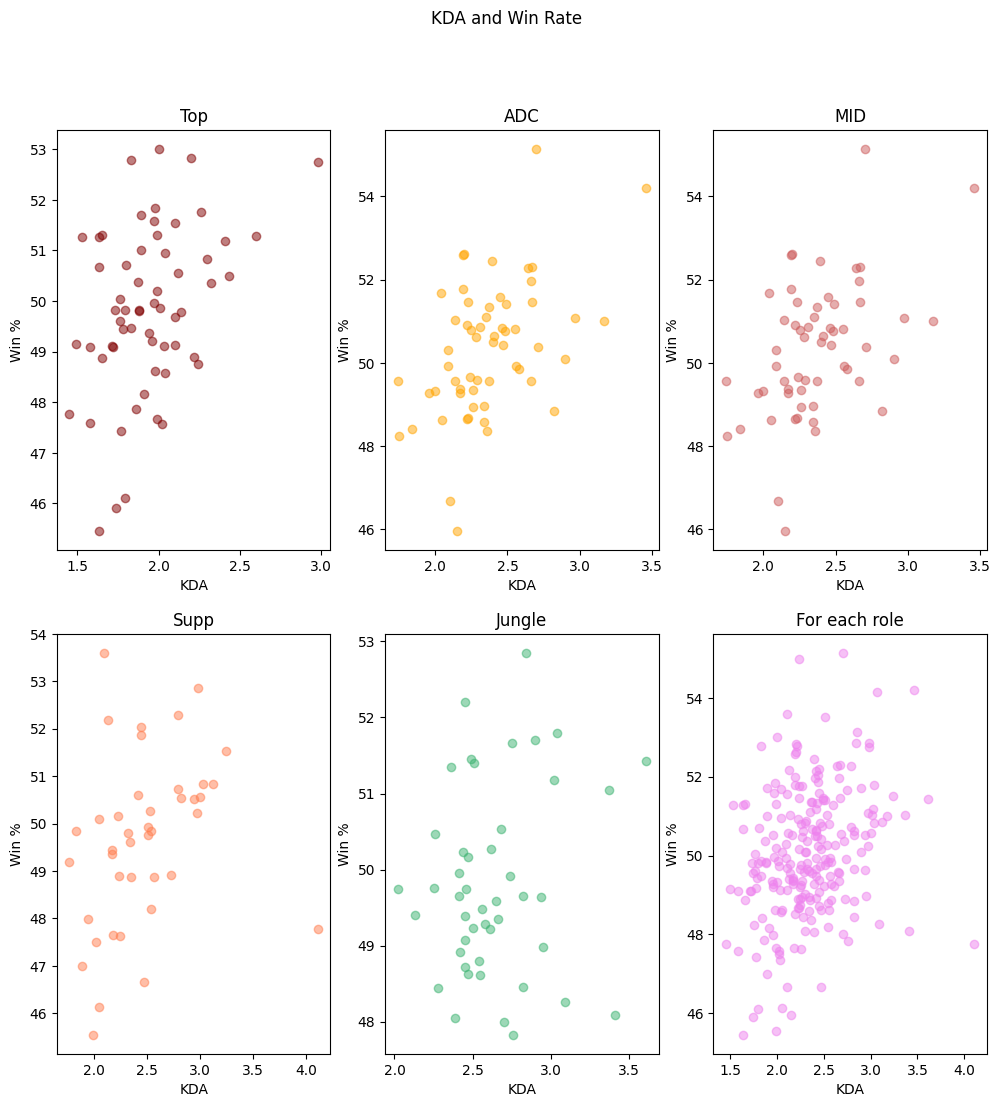

In [9]:
# Несколько диграмм рассеяния

fig, ax = plt.subplots(2,3, figsize=(12, 12))

df_MID = df.loc[df['Role'] == 'MID'].reset_index()
df_SUPPORT = df.loc[df['Role'] == 'SUPPORT'].reset_index()
df_JUNGLE = df.loc[df['Role'] == 'JUNGLE'].reset_index()
df_ADC = df.loc[df['Role'] == 'ADC'].reset_index()

df_SUPPORT['Win %'] = df_SUPPORT['Win %'].str[:-1].apply(pd.to_numeric)
df_JUNGLE['Win %'] = df_JUNGLE['Win %'].str[:-1].apply(pd.to_numeric)
df_MID['Win %'] = df_MID['Win %'].str[:-1].apply(pd.to_numeric)
df_ADC['Win %'] = df_ADC['Win %'].str[:-1].apply(pd.to_numeric)
df['Win %'] = df['Win %'].str[:-1].apply(pd.to_numeric)

ax[0,0].scatter(df_TOP['KDA'], df_TOP['Win %'], color="maroon", alpha = 0.5)
ax[0,0].set(title = "Top")
ax[0,0].set_xlabel('KDA')
ax[0,0].set_ylabel('Win %')

ax[0,1].scatter(df_MID['KDA'], df_MID['Win %'], color="orange", alpha = 0.5)
ax[0,1].set(title = "ADC")
ax[0,1].set_xlabel('KDA')
ax[0,1].set_ylabel('Win %')

ax[0,2].scatter(df_MID['KDA'], df_MID['Win %'], color="indianred", alpha = 0.5)
ax[0,2].set(title = "MID")
ax[0,2].set_xlabel('KDA')
ax[0,2].set_ylabel('Win %')

ax[1,0].scatter(df_SUPPORT['KDA'], df_SUPPORT['Win %'], color="coral", alpha = 0.5)
ax[1,0].set(title = "Supp")
ax[1,0].set_xlabel('KDA')
ax[1,0].set_ylabel('Win %')

ax[1,1].scatter(df_JUNGLE['KDA'], df_JUNGLE['Win %'], color="mediumseagreen", alpha = 0.5)
ax[1,1].set(title = "Jungle")
ax[1,1].set_xlabel('KDA')
ax[1,1].set_ylabel('Win %')

ax[1,2].scatter(df['KDA'], df['Win %'], color="violet", alpha = 0.5)
ax[1,2].set(title = "For each role")
ax[1,2].set_xlabel('KDA')
ax[1,2].set_ylabel('Win %')

fig.suptitle('KDA and Win Rate')
plt.show()

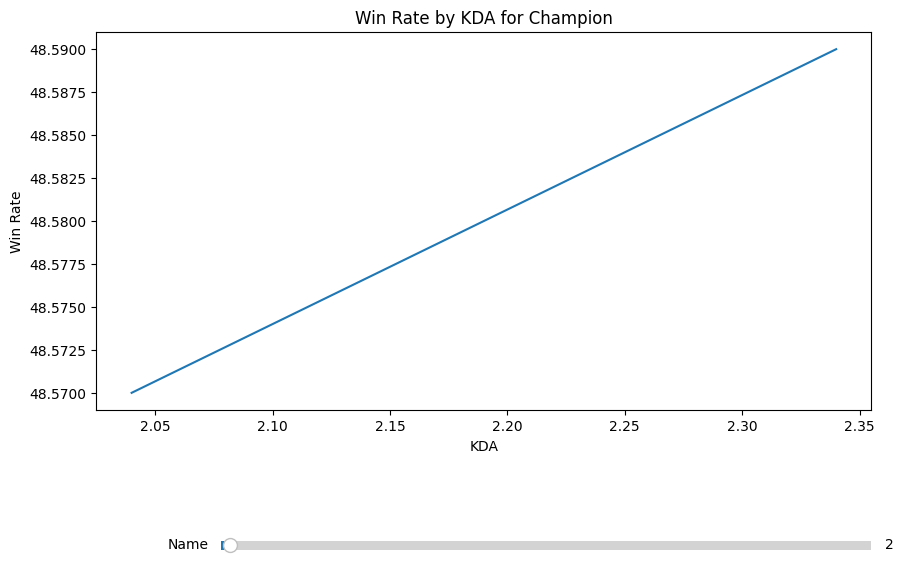

In [10]:
from matplotlib.widgets import Slider

champions = df['Name'].unique()

champion_data = df[df['Name'] == champions[2]]

fig, ax = plt.subplots(figsize=(10, 6))
plt.subplots_adjust(bottom=0.25)

# График для выбранного чемпиона
line, = ax.plot(champion_data['KDA'], champion_data['Win %'], label=f'Champion: {champions[2]}')
ax.set_xlabel('KDA')
ax.set_ylabel('Win Rate')
ax.set_title('Win Rate by KDA for Champion')

# Создание слайдера для выбора чемпиона
axcolor = 'lightgoldenrodyellow'
ax_champion_slider = plt.axes([0.25, 0.01, 0.65, 0.03], facecolor=axcolor)
champion_slider = Slider(ax_champion_slider, 'Name', 0, len(champions) - 1, valinit=2, valstep=1)

# Функция обновления графика при изменении значения слайдера
def update(val):
    champion_index = int(champion_slider.val)
    champion = champions[champion_index]
    champion_data = df[df['Name'] == champion]

    # Обновляем данные на графике
    line.set_ydata(champion_data['Win %'])
    line.set_xdata(champion_data['KDA'])
    ax.set_title(f'Win Rate by KDA for {champion}')
    fig.canvas.draw_idle()

# Подключаем обработчик изменения слайдера
champion_slider.on_changed(update)

plt.show()

4:

pandas:

Построить три разных вида графиков с использованием pandas.DataFrame.plot / Series.plot.

array([[<Axes: title={'center': '(ADC,)'}>,
        <Axes: title={'center': '(JUNGLE,)'}>],
       [<Axes: title={'center': '(MID,)'}>,
        <Axes: title={'center': '(SUPPORT,)'}>],
       [<Axes: title={'center': '(TOP,)'}>, <Axes: >]], dtype=object)

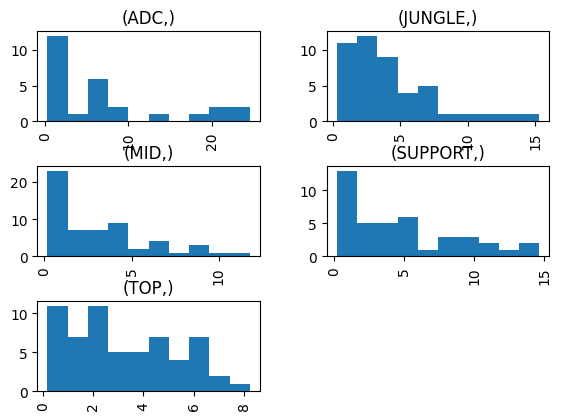

In [11]:
# Строим при помощи pandas

# DataFrame:

df['Pick %'] = df['Pick %'].str[:-1].apply(pd.to_numeric)

df.hist(column='Pick %', by=['Role'])

<Axes: title={'center': 'Ban %'}, xlabel='Role'>

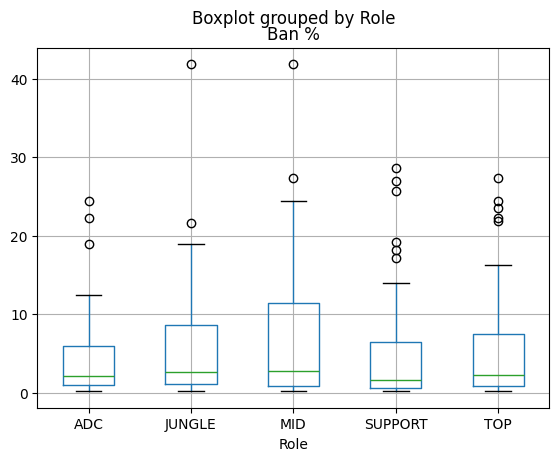

In [12]:
df['Ban %'] = df['Ban %'].str[:-1].apply(pd.to_numeric)

df.boxplot(by='Role', column='Ban %')

<Axes: >

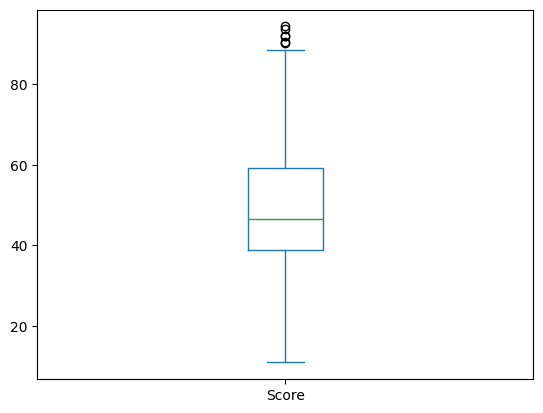

In [13]:
# Series

df['Score'].plot(kind='box')

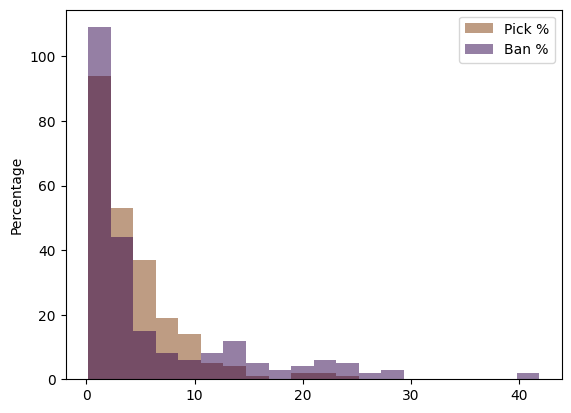

In [14]:
# Рассмотрим два показателя через Series

df[['Pick %', 'Ban %']].plot(kind='hist', bins=20, alpha=0.5, colormap='PuOr')

plt.legend(loc='upper right')
plt.ylabel("Percentage")
plt.show()

5:

seaborn:

Построить .pairplot на каком-либо наборе данных, проанализировать взаимосвязь набора числовых признаков.

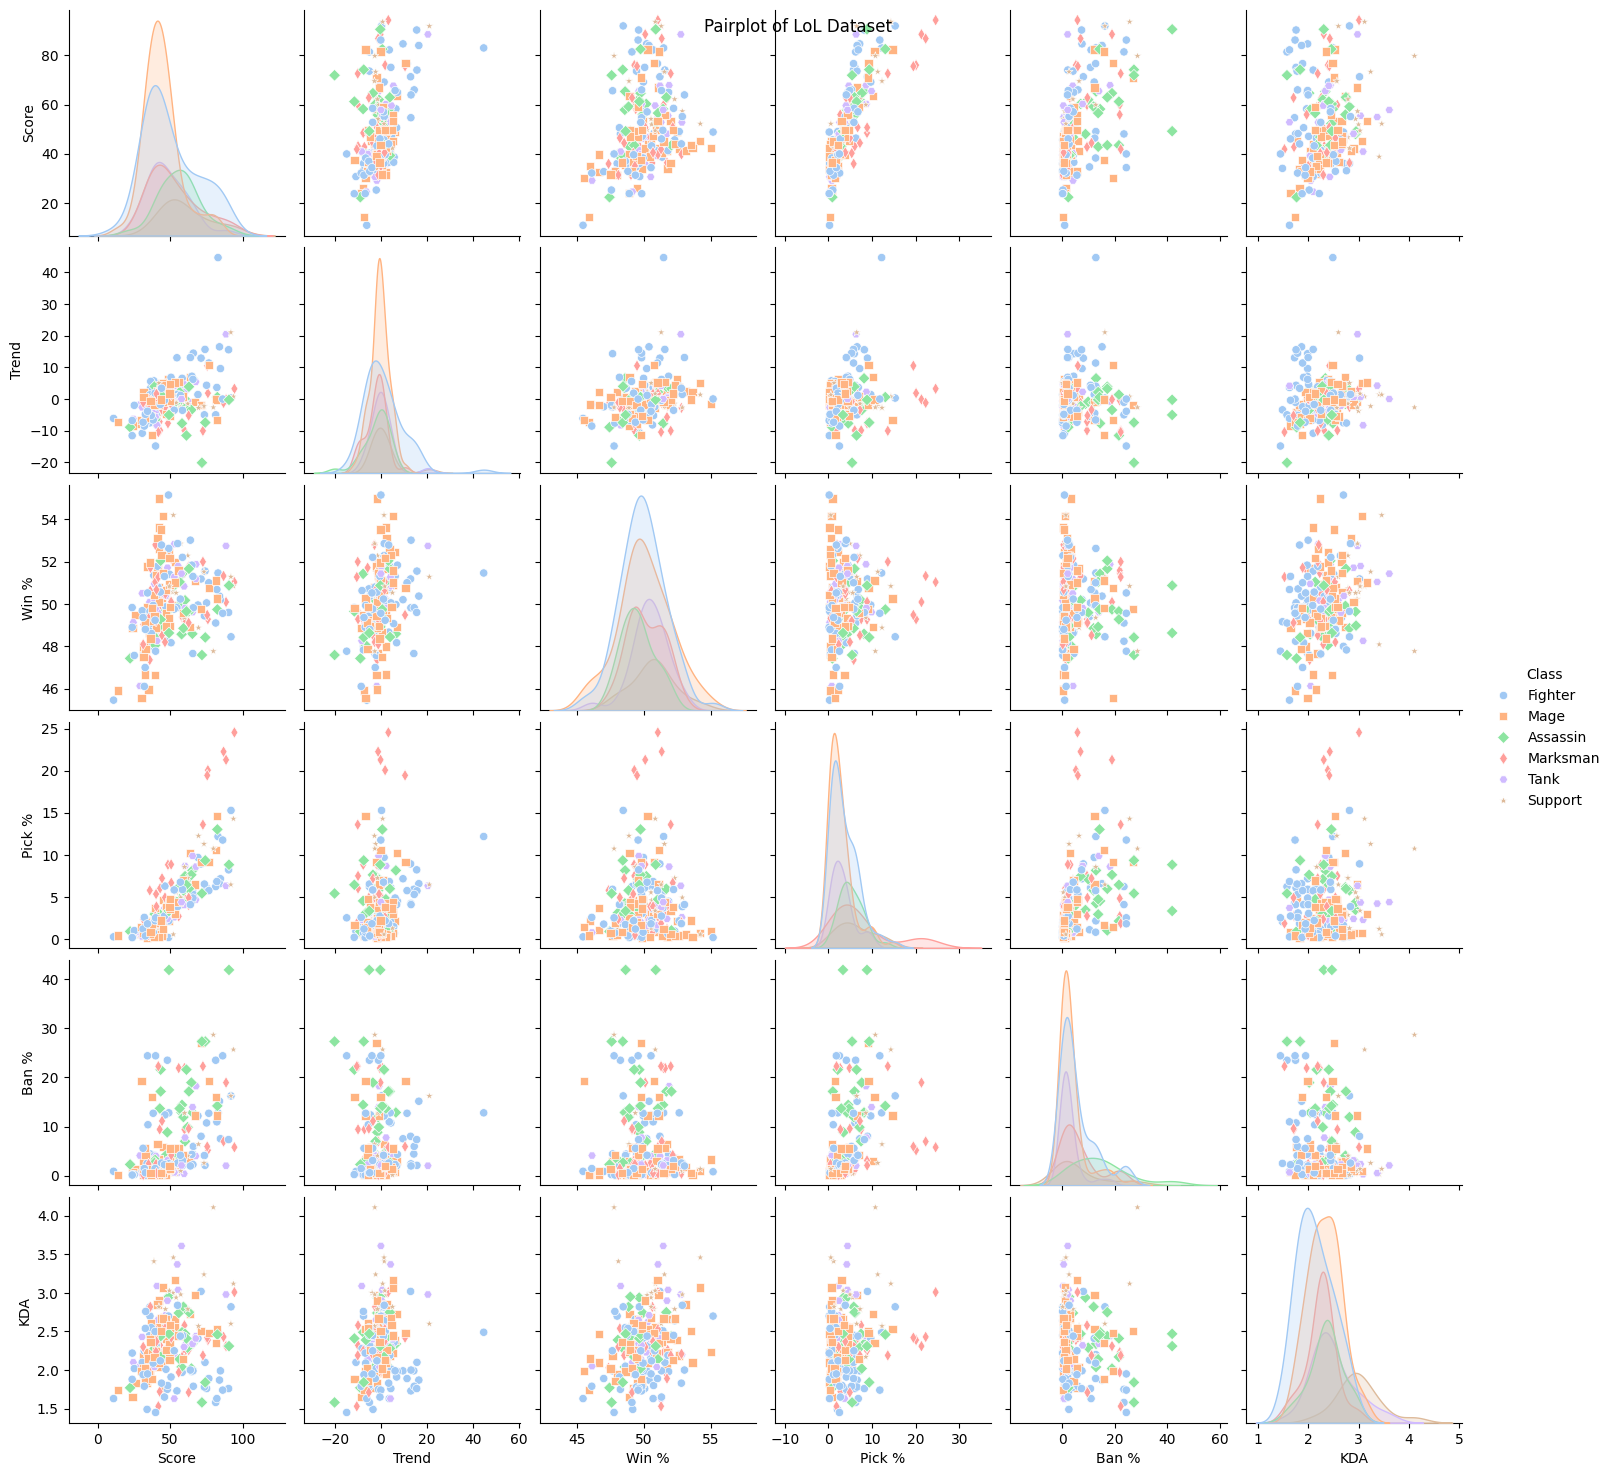

In [15]:
import seaborn as sns

sns.pairplot(df, palette='pastel', hue= 'Class', markers=["o", "s", "D", "d", "H", "*"])
plt.suptitle("Pairplot of LoL Dataset")
plt.show()

Построить .jointplot, проанализировать взаимосвязь двух конкретных числовых признаков.



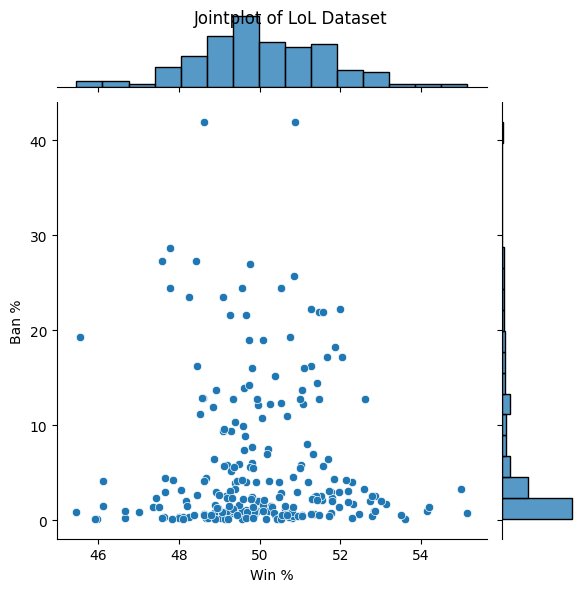

In [16]:
sns.jointplot(data=df, x='Win %', y='Ban %')
plt.suptitle("Jointplot of LoL Dataset")
plt.show()

Построить .boxplot и/или .violinplot на каком-либо наборе данных, проанализировать числовой признак в разрезе категориального.



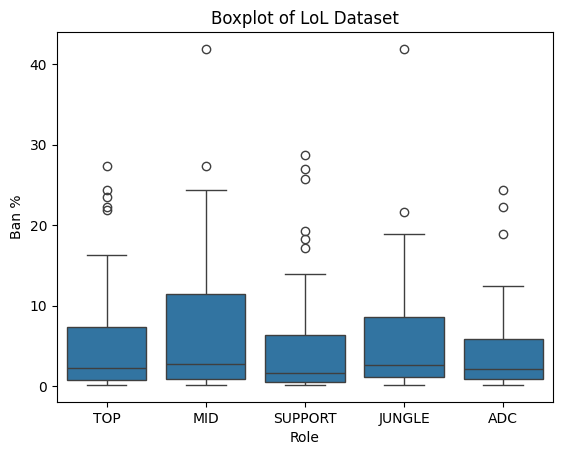

In [17]:
plt.figure()
sns.boxplot(x='Role', y='Ban %', data=df)
plt.title('Boxplot of LoL Dataset')
plt.show()

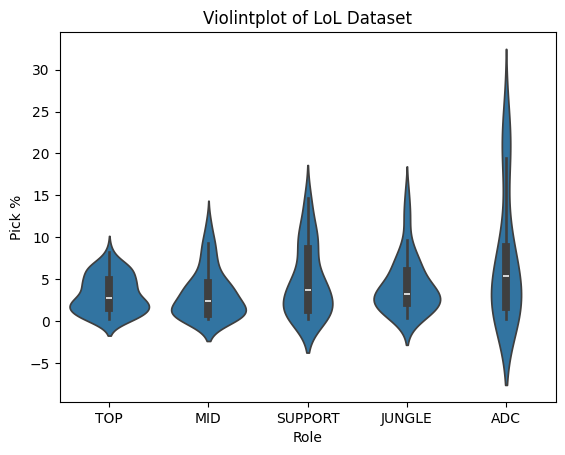

In [18]:
plt.figure()
sns.violinplot(x='Role', y='Pick %', data=df)
plt.title('Violintplot of LoL Dataset')
plt.show()

In [19]:
df['Role %'] = df['Role %'].str[:-1].apply(pd.to_numeric)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    232 non-null    object 
 1   Class   231 non-null    object 
 2   Role    232 non-null    object 
 3   Tier    232 non-null    object 
 4   Score   232 non-null    float64
 5   Trend   232 non-null    float64
 6   Win %   232 non-null    float64
 7   Role %  232 non-null    float64
 8   Pick %  232 non-null    float64
 9   Ban %   232 non-null    float64
 10  KDA     232 non-null    float64
dtypes: float64(7), object(4)
memory usage: 20.1+ KB


Построить график .heatmap попарной корреляции всех числовых признаков.



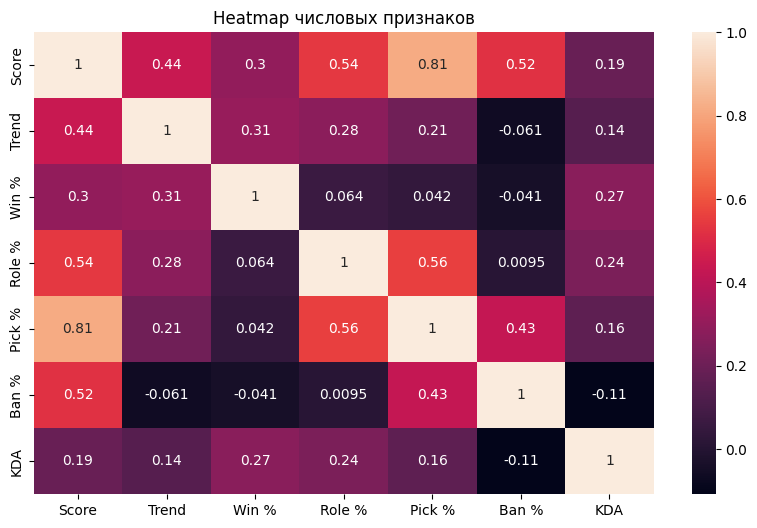

In [20]:
col = df.columns.values

plt.figure(figsize=(10, 6))
sns.heatmap(data=df[col[4:]].corr(), annot=True)
plt.title('Heatmap числовых признаков')
plt.show()

6:

scipy.stats:



In [21]:
from scipy import stats

Построить QQ-график (и гистограмму) для одного из числовых признаков с целью проверки на соответствие его распределения нормальному распределению.


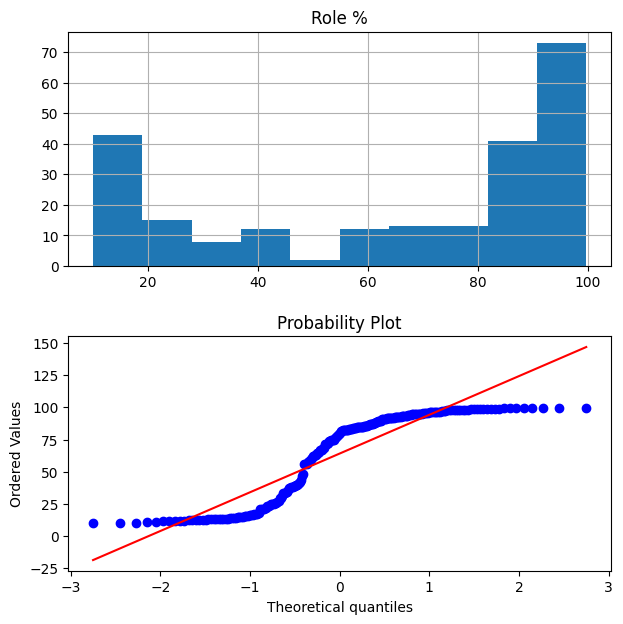

In [22]:
# Выбираем числовой признак для анализа и строим гистограмму и QQ-график

fig_p, ax_p = plt.subplots(2, 1, figsize=(7, 7))
stats.probplot(df['Role %'], dist="norm", plot=plt)
plt.subplot(2, 1, 2)
df.hist(ax=ax_p[0], column='Role %')
plt.show()

7:

plotly:



Построить несколько графиков разного вида.

Построить несколько суб-графиков на одном графике.

Построить интерактивный график.

In [23]:
import plotly.graph_objects as go
import plotly.express as px

In [24]:
# Создание круговой диаграммы plotly
fig = px.pie(roles, names='Role', values='Name',
             title='Distribution of Roles',
             labels={'Role': 'Role', 'Name': 'Champion Count'},
             hole=0.3)

# Отображение графика
fig.show()

In [25]:
# Создание столбчатой диаграммы
fig = px.bar(df_TOP_W[:5],
             x='Name',
             y='Win %',
             color='Name',
             color_discrete_sequence=['green', 'blue', 'red', 'orange', 'violet'],
             title='Top 5 TOP Champions by Win %',
             labels={'Name': 'Champion', 'Win %': 'Win Percentage'},
             text='Win %')  # Отображаем проценты на столбцах

# Показываем график
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.show()

In [26]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=3, subplot_titles=['Top', 'ADC', 'MID', 'Supp', 'Jungle'])

# Добавляем графики для каждой роли
fig.add_trace(go.Scatter(x=df_TOP['KDA'], y=df_TOP['Win %'], mode='markers',
                         marker=dict(color='maroon', opacity=0.5), name='Top'),
              row=1, col=1)

fig.add_trace(go.Scatter(x=df_ADC['KDA'], y=df_ADC['Win %'], mode='markers',
                         marker=dict(color='orange', opacity=0.5), name='ADC'),
              row=1, col=2)

fig.add_trace(go.Scatter(x=df_MID['KDA'], y=df_MID['Win %'], mode='markers',
                         marker=dict(color='indianred', opacity=0.5), name='MID'),
              row=1, col=3)

fig.add_trace(go.Scatter(x=df_SUPPORT['KDA'], y=df_SUPPORT['Win %'], mode='markers',
                         marker=dict(color='coral', opacity=0.5), name='Supp'),
              row=2, col=1)

fig.add_trace(go.Scatter(x=df_JUNGLE['KDA'], y=df_JUNGLE['Win %'], mode='markers',
                         marker=dict(color='mediumseagreen', opacity=0.5), name='Jungle'),
              row=2, col=2)

fig.update_layout(
    title='KDA and Win Rate by Role',
    showlegend=False,
    height=600,
    width=900,
)

fig.update_xaxes(title_text="KDA")
fig.update_yaxes(title_text="Win %")

fig.show()

In [27]:

fig = go.Figure()

fig.add_trace(go.Scatter(x=df_TOP['KDA'], y=df_TOP['Win %'], mode='markers',
                         marker=dict(color='maroon', opacity=0.5), name='Top'))
fig.add_trace(go.Scatter(x=df_ADC['KDA'], y=df_ADC['Win %'], mode='markers',
                         marker=dict(color='orange', opacity=0.5), name='ADC'))
fig.add_trace(go.Scatter(x=df_MID['KDA'], y=df_MID['Win %'], mode='markers',
                         marker=dict(color='indianred', opacity=0.5), name='MID'))
fig.add_trace(go.Scatter(x=df_SUPPORT['KDA'], y=df_SUPPORT['Win %'], mode='markers',
                         marker=dict(color='coral', opacity=0.5), name='Supp'))
fig.add_trace(go.Scatter(x=df_JUNGLE['KDA'], y=df_JUNGLE['Win %'], mode='markers',
                         marker=dict(color='mediumseagreen', opacity=0.5), name='Jungle'))

fig.update_layout(
    title='KDA and Win Rate by Role',
    xaxis_title="KDA",
    yaxis_title="Win %",
    showlegend=True,
    height=600,
    width=900,
)

fig.show()

In [ ]:
fig = make_subplots(rows=1, cols=1)

champion_data = df[df['Name'] == champions[2]]

fig.add_trace(go.Scatter(x=champion_data['KDA'], y=champion_data['Win %'],
                         mode='lines+markers'))

fig.update_layout(

    xaxis_title='KDA',
    yaxis_title='Win Rate',
    showlegend=True
)

# Функция обновления графика на основе слайдера
steps = []
for i, champion in enumerate(champions):
    champion_data = df[df['Name'] == champion]
    steps.append(
        {
            'label': champion,
            'method': 'update',
            'args': [
                {'x': [champion_data['KDA']]},
                {'y': [champion_data['Win %']]},
                {'title': f'Win Rate by KDA for {champion}'}
            ]
        }
    )

# Добавляем слайдер в график
fig.update_layout(
    sliders=[{
        'currentvalue': {'prefix': 'Champion: ', 'visible': True, 'xanchor': 'center'},
        'steps': steps
    }]
)

fig.show()